In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

## 0) Data Load

In [10]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [11]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [12]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [13]:
train_df = train_df1.copy()

train_17 = pd.read_csv('train_2017.csv',parse_dates=['transactiondate'],dtype={"parcelid": int})

prop_17 = pd.read_csv('properties_2017.csv',dtype={"parcelid": int})

train_df2 = pd.merge(train_17,prop_17,on='parcelid', how ='left',dtype={"parcelid": int})

train_df = pd.concat([train_df1,train_df2])

17년 데이터는 생략한 상태

# 1) Analysis Outer-Feature

## 1.1) Overview the Inner-feature data

- 'bathroomcnt'
- 'calculatedbathnbr'
- 'threequarterbathnbr'
- 'fullbathcnt'
- 'bedroomcnt'
- 'roomcnt’
- 'garagecarcnt'
- 'garagetotalsqft'
- 'airconditioningtypeid'
- 'fireplacecnt'
- 'fireplaceflag'
- 'hashottuborspa'
- 'heatingorsystemtypeid'
- 'poolcnt'
- 'poolsizesum'
- 'pooltypeid10'
- 'pooltypeid2'
- 'pooltypeid7'

- inner_feature는 총 18개의 컬럼으로 이뤄져 있고, 분류 기준은 집 구성하는 미시적 요소들에 관한 것이다.
- 화장실 갯수를 의미하는 컬럼이 중복된다.(bathroomcnt, calculatebathnbr)

In [5]:
inner_feature= [
    '화장실 갯수',
    '화장실 갯수',
    '집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)',
    '풀옵션 화장실의 갯수',
    '침실 갯수',
     '주거지에있는 총 객실 수',
    '차고 갯수',
    '차고 평방(크기)',
    '에이컨 아이디',
    '벽난로 수',
    '벽난로가 있는지 없는지',
    '난방 시스템의 유무',
    '난방 시스템의 타입',
    '수영장 갯수',
    '수영장 크기',
     '스파 또는 온천',
     '스파 / 온수 욕조가있는 수영장',
    ' 온수 욕조가없는 수영장'
]

In [3]:
inner_feature_col=[
'bathroomcnt',
'calculatedbathnbr',
'threequarterbathnbr',
'fullbathcnt',
'bedroomcnt',
'roomcnt',
'garagecarcnt',
'garagetotalsqft',
'airconditioningtypeid',
'fireplacecnt',
'fireplaceflag',
'hashottuborspa',
'heatingorsystemtypeid',
'poolcnt',
'poolsizesum',
'pooltypeid10',
'pooltypeid2',
'pooltypeid7'
]

In [8]:
inner_df = pd.DataFrame(columns=['name','feature'])
inner_df.name = inner_feature_col
inner_df.feature = inner_feature
inner_df

,name,feature
0,bathroomcnt,화장실 갯수
1,calculatedbathnbr,화장실 갯수
2,threequarterbathnbr,집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)
3,fullbathcnt,풀옵션 화장실의 갯수
4,bedroomcnt,침실 갯수
5,roomcnt,주거지에있는 총 객실 수
6,garagecarcnt,차고 갯수
7,garagetotalsqft,차고 평방(크기)
8,airconditioningtypeid,에이컨 아이디
9,fireplacecnt,벽난로 수


## 1.2) Datatype of Columns

In [15]:
print(train_df[inner_feature_col].dtypes,end='\n\n'),
print('Number of inner_feature_col:  {}'.format(len(inner_feature_col)))

bathroomcnt              float64
calculatedbathnbr        float64
threequarterbathnbr      float64
fullbathcnt              float64
bedroomcnt               float64
roomcnt                  float64
garagecarcnt             float64
garagetotalsqft          float64
airconditioningtypeid    float64
fireplacecnt             float64
fireplaceflag             object
hashottuborspa            object
heatingorsystemtypeid    float64
poolcnt                  float64
poolsizesum              float64
pooltypeid10             float64
pooltypeid2              float64
pooltypeid7              float64
dtype: object

Number of inner_feature_col:  18


- Inner_feature에는 18개의 컬럼이 있고, 두 개의 object 자료형과 16개의 float형이 있다.
- numerical data, object data 를 가지고 있는 컬럼들을 나눠서 분석을 하도록 하겠다.

In [20]:
inner_numeric = []
inner_object = []
for col in inner_feature_col:
    if train_df[col].dtypes == 'float64':
        inner_numeric.append(col)
    else:inner_object.append(col)

In [23]:
inner_numeric
print(len(inner_numeric))

16


In [24]:
inner_object
print(len(inner_object))

2


## 1.3) Individual columns' feature analysis

### scatter plot about numerical data

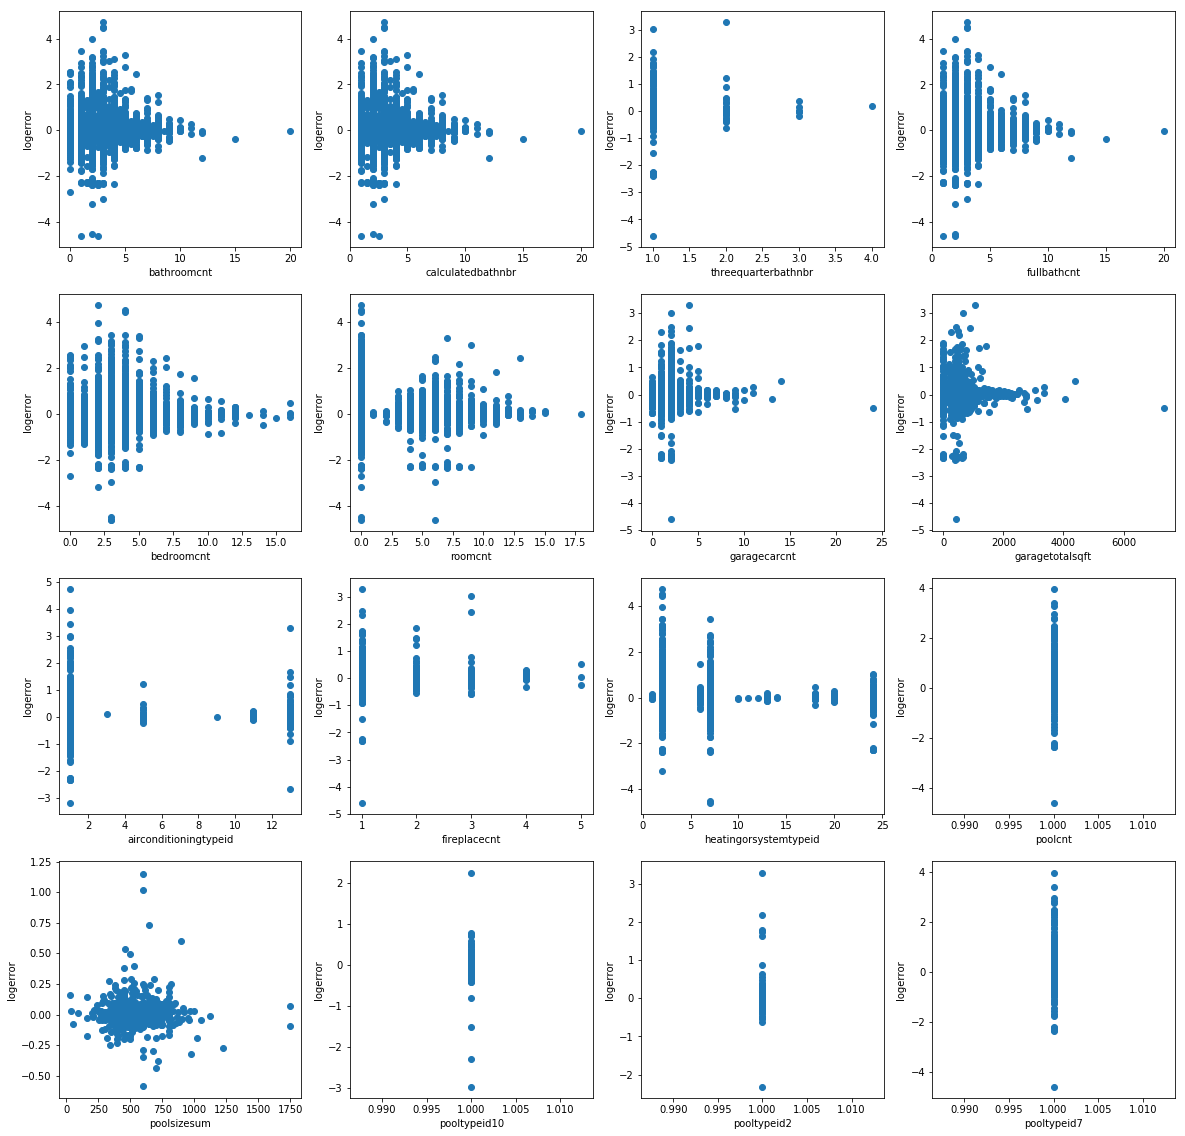

In [25]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(inner_numeric):
    plt.subplot(4,4,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- float 자료형에 대한 scatterplot을 그려본 결과 분포의 형태가 continuous하지 않고, discrete한 분포를 띄고 있다.
- 즉, numeric category를 가지고 있을 수 있는 컬럼이라고 생각하고, 카테고리의 갯수를 40개 미만으로 가지는 데이터에 대해서 다시 분포에 대해 시각화해본다.

In [1]:
discrete_inner_col = []
for idx,col in enumerate(inner_numeric):
    if len(train_df[col].value_counts())<40:
        print(train_df[col].value_counts())
        discrete_inner_col.append(col)
len(discrete_inner_col)

NameError: name 'inner_feature_col' is not defined

40 개 미만의 카테고리를 가지는 discrete data column 이 총 14개가 나왔다. 이 컬럼들에 대해서 stripplot,viloinplot을 적용해 시각화한다.

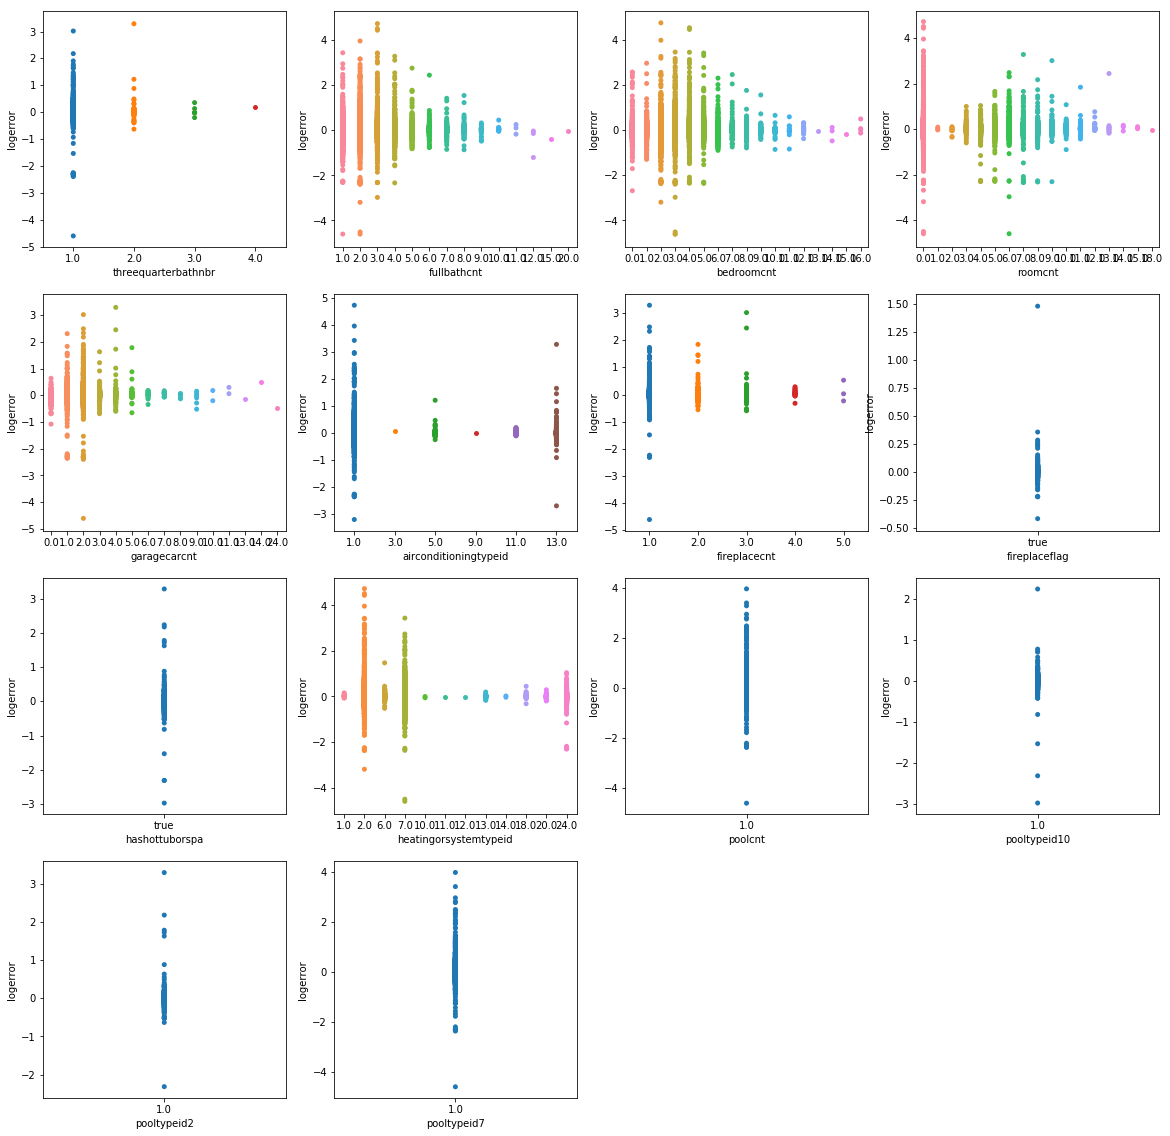

In [32]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_inner_col):
    plt.subplot(4,4,idx+1)
    sns.stripplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

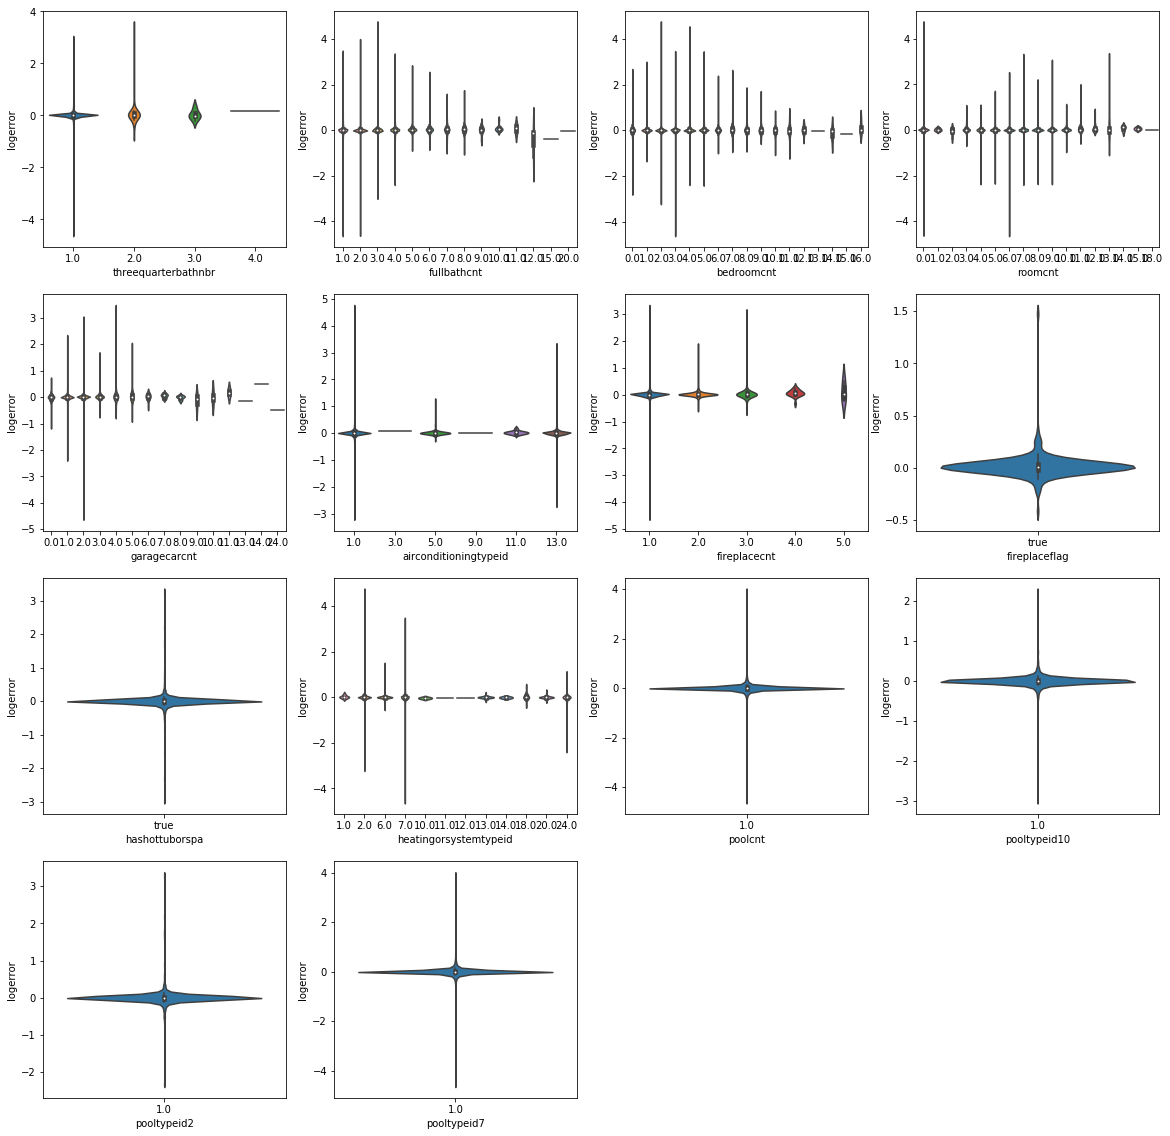

In [33]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_inner_col):
    plt.subplot(4,4,idx+1)
    sns.violinplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- 카테고리가 하나인 컬럼들이 존재한다.
- 카테고리와 분포도를 감안하고 곧 실시할 missing_value가 얼마나 차지할지를 고려하여서 Data cleaning을 실시

마지막으로, object datatype을 가지는 컬럼 2개에 대해서도 countplot으로 시각화를 한다.

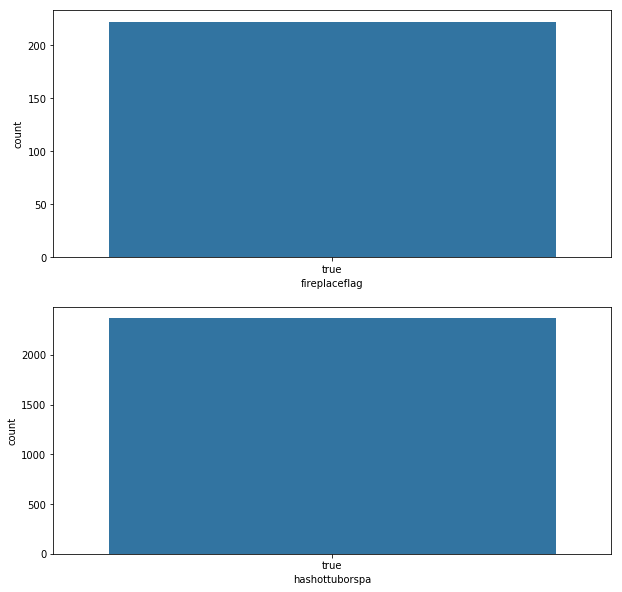

In [28]:
plt.figure(figsize=(10,10))
for idx,col in enumerate(inner_object):
    plt.subplot(2,1,idx+1)
    sns.countplot(train_df[col],data=train_df)
    plt.xlabel(col)
    plt.ylabel('count')
plt.show()

- object datatype에 대한 column 의 countplot을 보면, 카테고리가 하나다. 
- 곧 실시할 data cleaning에서의 imputation strategy에 참고해야 할 사항이다.

# 2) Analysis Missing value 

우선 inner-feature 내의 컬럼들로 구성된 데이터 프레임 'inner_df'를 생성해보겠습니다.

In [35]:
inner_df = train_df[inner_feature_col]
inner_df.tail()

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt,bedroomcnt,roomcnt,garagecarcnt,garagetotalsqft,airconditioningtypeid,fireplacecnt,fireplaceflag,hashottuborspa,heatingorsystemtypeid,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7
90270,1.0,1.0,NaN,1.0,1.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0
90271,3.0,3.0,NaN,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
90272,2.0,2.0,NaN,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90273,2.0,2.0,NaN,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
90274,1.0,1.0,NaN,1.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN


In [38]:
missing_inner_df = inner_df.isnull().sum().reset_index()
missing_inner_df.columns = ['col','missing_cnt']
missing_inner_df['missing_ratio'] = missing_inner_df.missing_cnt / len(inner_df)
missing_inner_df

,col,missing_cnt,missing_ratio
0,bathroomcnt,0,0.000000
1,calculatedbathnbr,1182,0.013093
2,threequarterbathnbr,78266,0.866973
3,fullbathcnt,1182,0.013093
4,bedroomcnt,0,0.000000
5,roomcnt,0,0.000000
6,garagecarcnt,60338,0.668380
7,garagetotalsqft,60338,0.668380
8,airconditioningtypeid,61494,0.681185
9,fireplacecnt,80668,0.893581


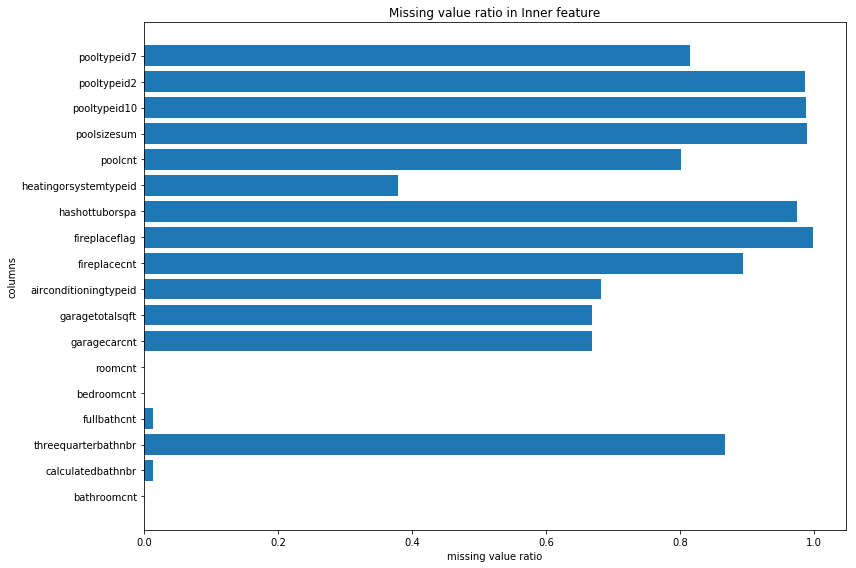

In [39]:
plt.figure(figsize=(12,8))
plt.barh(missing_inner_df.col,missing_inner_df.missing_ratio)
plt.title('Missing value ratio in Inner feature')
plt.xlabel('missing value ratio')
plt.ylabel('columns')
plt.tight_layout()
plt.show()